In [1]:
import numpy as np
from numpy.linalg import solve, inv
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from Code.fixed_income_derivatives_E2024 import *
from scipy.optimize import minimize
from scipy.stats import norm

In [2]:
#1.a)
T = np.array([0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10])
R = np.array([0.0334, 0.0352, 0.0375, 0.0392, 0.0405, 0.0422, 0.0433, 
              0.0445, 0.0451, 0.0455, 0.0459, 0.0462])
R_star = np.array([0.0352, 0.0361, 0.0374, 0.0387, 0.0397, 0.0415, 
                   0.0429, 0.0449, 0.0462, 0.0471, 0.0483, 0.0492])
sigma = 0.04
r0_tilde = 0.038
a_tilde = 1.2
b_tilde = 0.07
params = r0_tilde, a_tilde, b_tilde
def f(x):
    return fit_vasicek_no_sigma_obj(x, sigma, R, T)
res = minimize(f, params, method='Nelder-Mead')
r0_hat, a_hat, b_hat = res.x
r0_tilde2 = 0.038
a_tilde2 = 1.2
b_tilde2 = 0.035
params = r0_tilde2, a_tilde2, b_tilde2
def f2(x):
    return fit_vasicek_no_sigma_obj(x, sigma, R_star, T)
res2 = minimize(f2, params, method='nelder-mead',options={'xatol': 1e-12,'disp': True})
r0_hat2, a_hat2, b_hat2 = res2.x
#i)
print('r0_hat:', r0_hat)
print('a_hat:', a_hat)
print('b_hat:', b_hat)
print('r0_hat2:', r0_hat2)
print('a_hat2:', a_hat2)
print('b_hat2:', b_hat2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 218
         Function evaluations: 415
r0_hat: 0.03180645790736
a_hat: 1.993980603937298
b_hat: 0.09407203929111235
r0_hat2: 0.03403852508971873
a_hat2: 0.7894248433773109
b_hat2: 0.041515114462899


MSE: 2.1849001826715645e-10


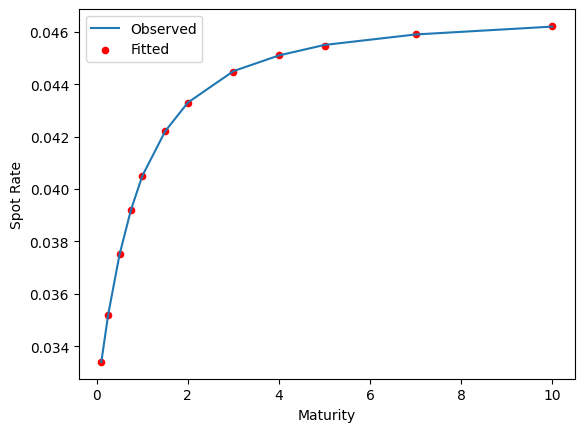

In [3]:
#ii)
R_fit = spot_rate_vasicek(r0_hat, a_hat, b_hat, sigma, T)
mse = np.mean((R - R_fit)**2)
print('MSE:', mse)
plt.plot(T, R, label='Observed')
plt.scatter(T, R_fit, label='Fitted', s=20, color='red')
plt.xlabel('Maturity')
plt.ylabel('Spot Rate')
plt.legend()
plt.show()

In [4]:
#1.b)
#i)
T_swap = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
ZCB_swap = zcb_price_vasicek(r0_hat, a_hat, b_hat, sigma, T_swap)
ZCB_swap2 = zcb_price_vasicek(r0_hat2, a_hat2, b_hat2, sigma, T_swap)
swap_rate, accrual_factor = swap_rate_from_zcb_prices(0, 0, 6, 0.5, T_swap, ZCB_swap, 0.5)
swap_rate2, accrual_factor2 = swap_rate_from_zcb_prices(0, 0, 6, 0.5, T_swap, ZCB_swap2, 0.5)
print('Swap Rate:', swap_rate)
print('Swap Rate2:', swap_rate2)

Swap Rate: 0.04609469913996068
Swap Rate2: 0.04809108642865759


In [5]:
#ii)
caplet_prices = caplet_prices_vasicek(sigma, swap_rate, a_hat, T_swap, ZCB_swap)
caplet_price = sum(caplet_prices)
caplet_prices2 = caplet_prices_vasicek(sigma, swap_rate2, a_hat2, T_swap, ZCB_swap2)
caplet_price2 = sum(caplet_prices2)
print('Caplet Prices:', caplet_prices)
print('Caplet Price:', caplet_price)
print('Caplet Prices2:', caplet_prices2)
print('Caplet Price2:', caplet_price2)

Caplet Prices: [0.         0.         0.00182848 0.00243326 0.0025945  0.00261077
 0.00257747 0.00252744 0.0024723  0.00241618 0.00236055 0.00230591
 0.00225244]
Caplet Price: 0.026379306286245078
Caplet Prices2: [0.         0.         0.00260666 0.00394282 0.00461451 0.00494888
 0.00509706 0.00513781 0.00511497 0.00505402 0.00497024 0.00487303
 0.00476829]
Caplet Price2: 0.05112829239703244


In [6]:
#1.c)
#The par swap rate is calculated assuming that the floating leg and fixed leg
#have the same value at the start of the swap. 
#The interest rate swap eliminates all uncertainty about fixed future coupon payments. However,
# this option also has no upside in that the investor will not benefit if future 6M EURIBOR fixings
# are low. The interest rate cap prevents interest rate payments from becoming very large but retains
# the upside that the client will benefit from low future EURIBOR fixings. Therefore, there is nothing
# surprising about the fact that choosing the interest rate cap comes at a cost.

In [7]:
EURIBOR_fixing = [
{"id": 0,"instrument": "libor","maturity": 1/2, "rate":0.04110}]
fra_market = [
{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate":  0.04358},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate":  0.04423},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate":  0.04484},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.04542},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.04597},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.04649},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.04698},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.04743},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.04787}]
swap_market = [
{"id": 10,"instrument": "swap","maturity": 2, "rate":  0.04723, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate":  0.04891, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate":  0.05004, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate":  0.05084, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate":  0.05184, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.05263, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.05325, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.05354, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.05382, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []}]
data2 = EURIBOR_fixing + fra_market + swap_market

In [8]:
#2.a)
EURIBOR_fixing = [
{"id": 0,"instrument": "libor","maturity": 1/2, "rate":0.04110}]
fra_market = [
{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate":  0.04358},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate":  0.03295},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate":  0.03418},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.03531},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.03635},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.03731},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.03819},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.03900},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.03975}]
swap_market = [
{"id": 10,"instrument": "swap","maturity": 2, "rate":  0.03824, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate":  0.04083, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate":  0.04242, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate":  0.04346, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate":  0.04468, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.04561, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.04633, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.04667, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.04700, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []}]
data = EURIBOR_fixing + fra_market + swap_market
interpolation_options = {"method":"hermite","degree":2,"transition": "smooth"}
T_fit, R_fit = zcb_curve_fit(data,interpolation_options = interpolation_options)
T_6m = np.array([i*0.5 for i in range(0,61)])
p_inter, R_inter, f_inter, T_inter = zcb_curve_interpolate(T_6m,T_fit,R_fit,interpolation_options = interpolation_options)
T_fit2, R_fit2 = zcb_curve_fit(data2,interpolation_options = interpolation_options)
p_inter2, R_inter2, f_inter2, T_inter2 = zcb_curve_interpolate(T_6m,T_fit2,R_fit2,interpolation_options = interpolation_options)

In [9]:
#i)
T = np.array([0.5, 1, 3, 5, 10, 20, 30])
ZCB, spot_rates, _, _ = zcb_curve_interpolate(T, T_fit, R_fit, interpolation_options)
ZCB2, spot_rates2, _, _ = zcb_curve_interpolate(T, T_fit2, R_fit2, interpolation_options)
print('Spot Rates:', spot_rates)
print('Spot Rates2:', spot_rates2)

Spot Rates: [0.0406834  0.03882483 0.04051578 0.04323658 0.04549467 0.04664345
 0.04702701]
Spot Rates2: [0.0406834  0.04332065 0.04847566 0.05045775 0.05234596 0.05334786
 0.05368808]


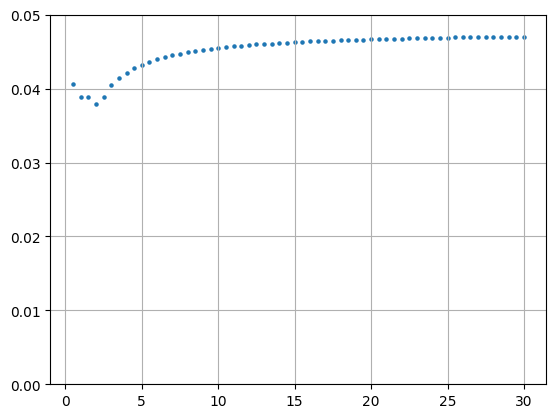

In [10]:
#ii)
plt.scatter(T_inter[1:], R_inter[1:], label='Interpolated', s=5)
plt.ylim(0, 0.05)
plt.grid()
plt.show()

In [11]:
#2.b)
swap_rates = []
for i in range(2, 61):
    swap_rate, _ = swap_rate_from_zcb_prices(0, 0, T_6m[i], 0.5, T_6m, p_inter, 0.5)
    swap_rates.append(swap_rate)

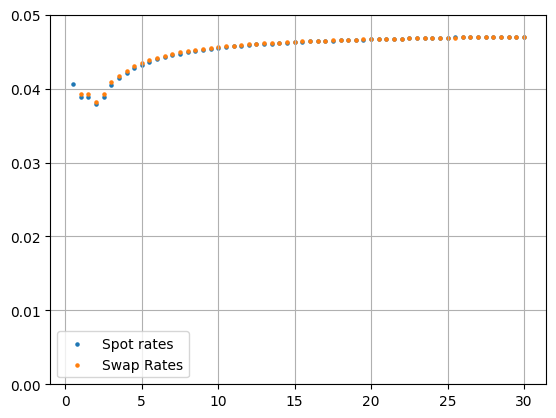

In [12]:
#i)
plt.scatter(T_inter[1:], R_inter[1:], label='Spot rates', s=5)
plt.scatter(T_6m[2:], swap_rates, label='Swap Rates', s=5)
plt.legend()
plt.ylim(0, 0.05)
plt.grid()
plt.show()

In [13]:
#ii)
#They are very close

In [14]:
#iii)
# Zero coupon spot rates and par swap rates for same maturities are almost always very close.
# The main reason for this result is that a swap and a zero coupon bond on average, over the
# life of these securities, have very similar cashflows. A zero coupon bond pays no coupons and
# the net coupon to a swap being the difference between a fixed and a floating rate is on average
# also close to zero. A zero coupon bond pays the whole notional at maturity to the lender, and
# though there is no exchange of notional in practice, a swap also works on a notional repaid at
# maturity.

In [15]:
#2.c)
#i)
swap_rate, accrual_factor = swap_rate_from_zcb_prices(0, 0, 6, 0.5, T_6m, p_inter, 0.5)
PnL = accrual_factor * (0.047 - swap_rate)
swap_rate2, accrual_factor2 = swap_rate_from_zcb_prices(0, 0, 6, 0.5, T_6m, p_inter2, 0.5)
PnL2 = accrual_factor2 * (0.047 - swap_rate2)
price_now = - (1-p_inter[12]) + sum(p_inter[1:13]*0.5*0.047)
price_now2 = - (1-p_inter2[12]) + sum(p_inter2[1:13]*0.5*0.047)
print('PnL:', PnL)
print('PnL2:', PnL2)
print('Price Now:', price_now)
print('Price Now2:', price_now2)

PnL: 0.01482160410028848
PnL2: -0.022647025751646385
Price Now: 0.014821604100288488
Price Now2: -0.022647025751646427


In [16]:
#ii)
# A receiver swap is positioned for falling interest rates and since the colleague lost money on
# his position, we can only assume that rates have risen since he entered into the swap. The 6Y
# par swap rate is now 0.05135 and hence, the par swap rate is today higher than the par swap
# rate of 0.04700 when the colleague entered into the swap. This corresponds to a rate increase
# of roughly 41 bps which when multiplied by the accrual factor slightly above 5 does indeed
# yield a little more than 200 bps.

In [17]:
#3.a)
T = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
p = np.array([0.98314916, 0.96478677, 0.94539738, 0.92535353, 0.90493951, 
              0.88437071, 0.86380916, 0.84337571, 0.8231596, 0.80322594, 
              0.78362142, 0.76437872, 0.74551992, 0.72705911])
K_offset = np.array([-300, -250, -200, -150, -100, -50, 0, 50, 100, 150, 
                     200, 250, 300])
pi_swaption = np.array([0.12256859, 0.10253932, 0.08273803, 0.0633625, 
                        0.04480655, 0.02793572, 0.0145331, 0.00650867, 
                        0.0030062, 0.00158778, 0.00094974, 0.00062285, 
                        0.00043427])
swap_rate, accrual_factor = swap_rate_from_zcb_prices(0, 2, 7, 0.5, T, p, 0.5)

In [18]:
#i)
print('Swap Rate:', swap_rate)

Swap Rate: 0.0487002882976103


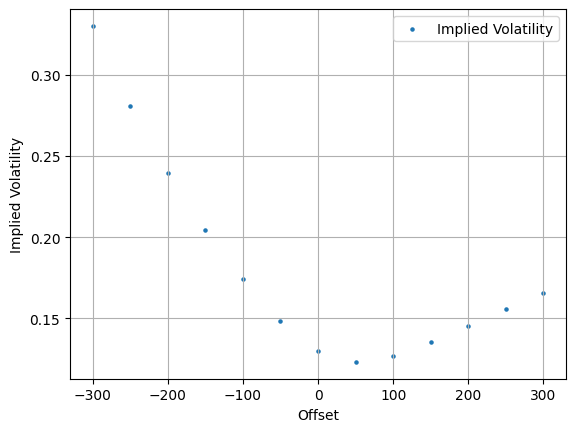

In [19]:
#ii)
K = swap_rate + K_offset/10000
iv_swaption = []
for i in range(len(K)):
    iv = black_swaption_iv(pi_swaption[i], 2, K[i], accrual_factor, swap_rate, iv0=0.25)
    iv_swaption.append(iv)
plt.scatter(K_offset, iv_swaption, label='Implied Volatility', s=5)
plt.xlabel('Offset')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid()

In [20]:
#iii)
# There is indeed a ’smirk’ in implied volatilities clearly indicating that market prices are not
# equivalent to what would arise in a Black’s model. The pricing measure chosen by the market
# is not compatible with the 2Y 5Y forward par swap rate following a log-normal distribution.
# The distribution implied by the measure chosen by the market has more fat tails and displays
# more left skewness than that of a log-normal random variable. This is a finding that is very
# much consistent with typical market behavior

In [23]:
#3.b)
sigma0_tilde = 0.06
beta_tilde = 0.5
v_tilde = 0.45
rho_tilde = -0.2
params = sigma0_tilde, beta_tilde, v_tilde, rho_tilde
def f(x):
    y = fit_sabr_obj(x, iv_swaption, K, 2, swap_rate)
    return y
res = minimize(f, params, method='nelder-mead', options={'disp': True})
sigma0_hat, beta_hat, v_hat, rho_hat = res.x
#i)
print("sigma0_hat: ", sigma0_hat)
print("beta_hat:, ", beta_hat)
print("v_hat:, ", v_hat)
print("rho_hat", rho_hat)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 354
         Function evaluations: 570
sigma0_hat:  0.04948540771434625
beta_hat:,  0.6966107058738245
v_hat:,  0.6497140735722688
rho_hat -0.31905025986980884


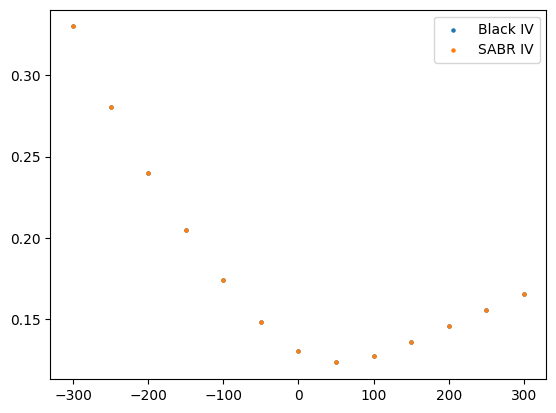

In [25]:
#ii)
iv_simulated = []
for i in range(len(K)):
    iv_simulated.append(sigma_sabr(K[i],2,swap_rate, sigma0_hat, beta_hat, v_hat, rho_hat))
plt.scatter(K_offset, iv_swaption, s=5, label="Black IV")
plt.scatter(K_offset, iv_simulated, s=5, label="SABR IV")
plt.legend()
plt.show()


In [28]:
#3.c)
#ii)
M = 2000
N = 10000
T = 2
simulated_swap_rates = np.zeros(N)
for i in range(N):
    F, sigma = sabr_simul(swap_rate, sigma0_hat, beta_hat, v_hat, rho_hat, M, T)
    simulated_swap_rates[i] = F[-1]
digital_option_price = p[3]*np.mean(simulated_swap_rates >= swap_rate + 0.0125)
print('Digital Option Price:', digital_option_price)

/Users/lukasbehr/Documents/Fixed_Income/ReExam2023/../Code/fixed_income_derivatives_E2024.py:1190: RuntimeWarning: invalid value encountered in scalar power
  F[m] = F[m-1] + sigma[m-1]*F[m-1]**beta*delta_sqrt*Z[0,m-1]


Digital Option Price: 0.064126999629


In [34]:
#ii)
# The digital option will protect the client against rising interest rates but the pay-off of the
# digital option will be 1 no matter how far ITM the option is, so the client’s pay-off won’t be
# very high if interest rates rise sharply which, depending on his situation, could be a problem.

In [35]:
#iii)
# The strategy that closest resembles a digital option with a strike 125 bps above the ATMF is
# to be long one maturity Kof f set = 100 and short one Kof f set = 150 swaption. The price of such
# an instrument would be roughly 14 bps.